In [5]:
pip install Cython

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.8 MB 2.1 MB/s eta 0:00:02
   ----------------------- ---------------- 1.6/2.8 MB 17.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pystan

  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pystan-3.7.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.6.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.5.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.3.0-py3-none-any.whl.metadata (3.6 kB)
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.2.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached pystan-3.1.1-py3-none-any.whl.metadata (3.6 kB)
  Using cac

In [3]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB 8.6 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/13.3 MB 12.5 MB/s eta 0:00:01
   ------ --------------------------------- 2.2/13.3 MB 17.4 MB/s eta 0:00:01
   ----------- ---------------------------- 3.8/13.3 MB 24.1 MB/s eta 0:00:01
   ------------ --------------------------- 4.1/13.3 MB 18.7 MB/s eta 0:00:01
   ----------------- ---------------------- 5.7/13.3 MB 22.9 MB/s eta 0:00:01
   ------------------- -------------------- 6.5/13.3 MB 21.8 MB/s eta 0:00:01
   -------------------- ------------------- 6.7/13.3 MB 19.5 MB/s eta 0:00:01
   --------------------- ------------------ 7.2/13.3 MB 17.7 MB/s eta 0:00:01
   -------------------------- ------------- 8.8/13.3 MB 20.2 MB/s eta 0:00:01
   ---------------------------------- ----- 11.5/13.3 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------  13.3/13.3 MB 27.3 MB/s eta 0

In [8]:
pip install pandas_datareader

   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ---------------------- ----------------- 61.4/109.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
#경고메시지를 무시하도록 설정 (경고 모듈 가져옴)
import warnings
warnings.filterwarnings("ignore")

# pandas, numpy 모듈 import
import pandas as pd
import pandas_datareader.data as web #주가 데이터를 가져오기 위한 판다스 데이터 리더 모듈을 가져옴
import numpy as np

# 운영 체제 정보를 확인하고, matplotlib을 사용하여 그래프 그릴 준비하기
import platform
import matplotlib.pyplot as plt #데이터를 시각화하기 위한 맷플롯립 모듈의 플롯 함수를 가져.

# 주피터 노트북에서 맷플롯립 그래프를 인라인으로 표시하도록 설정

%matplotlib inline 

from prophet import Prophet #Prophet이라는 라이브러리에서 Prophet 클래스를 가져옴. Prophet은 시계열 데이터를 예측하기 위한 라이브러리.
from datetime import datetime #날짜 및 시간을 다루기 위한 datetime 모듈에서 datetime 클래스를 가져옴.

#한글 폰트 문제 해결
path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Sorry')

plt.rcParams['axes.unicode_minus'] = False

In [14]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv',
                           encoding='utf-8', thousands=',',
                           names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()] #'hit' 열이 null이 아닌 행들만 선택하여 새로운 데이터프레임으로 할당.
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


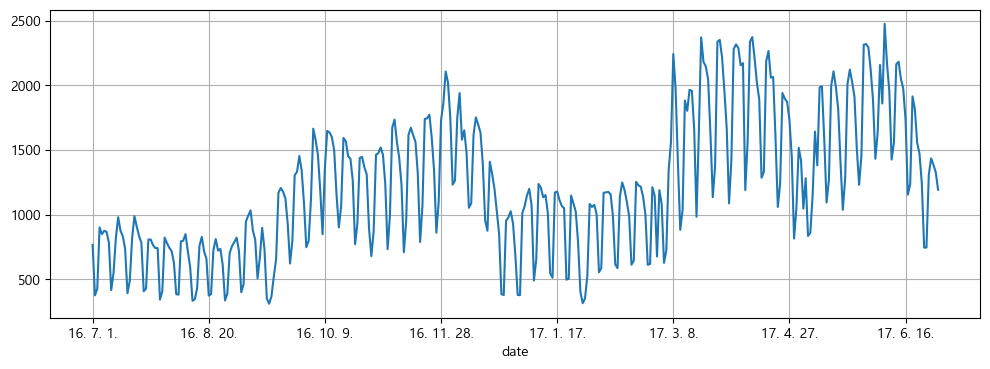

In [15]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [16]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [24]:
#error 함수가 x, y, f를 인자로 받고, 함수 내에서 주어진 식을 계산한 후 결과를 반환.
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [25]:
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.47773079342267


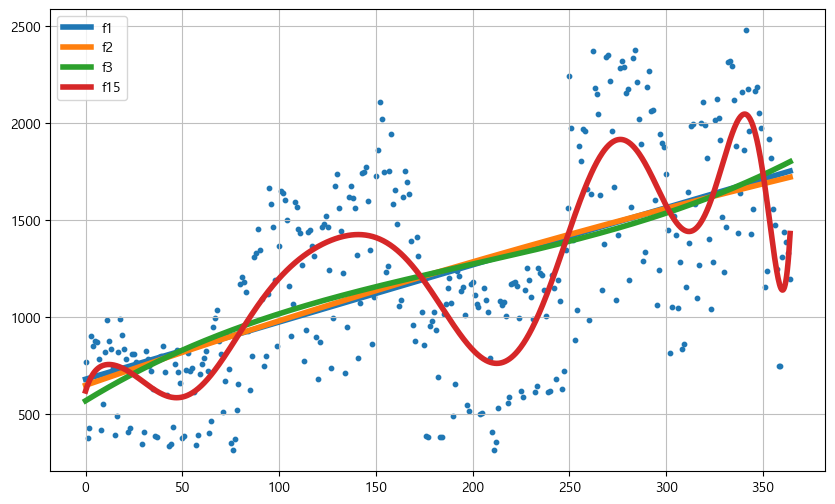

In [26]:
plt.figure(figsize=(10,6)) #그림의 크기를 지정. 너비는 10이고 높이는 6.
plt.scatter(time, traffic, s=10) #주어진 데이터를 산점도로 나타냄. x축은 시간이고 y축은 트래픽, s=10은 점의 크기

#함수에 대한 그래프그리기
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75') #그리드를 추가하며, 선의 스타일을 지정
plt.legend(loc=2) #범례를 추가하고 위치를 지정
plt.show()

In [28]:
# 데이터프레임 생성
df = pd.DataFrame({'ds': pinkwink_web.index, 'y': pinkwink_web['hit']})
df.reset_index(inplace=True)

# 'ds' 열을 날짜 형식으로 변환
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")

# 'date' 열 삭제
del df['date']

# Prophet 모델 초기화
m = Prophet(yearly_seasonality=True)

# 모델 학습
m.fit(df)

14:51:47 - cmdstanpy - INFO - Chain [1] start processing
14:51:47 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
#Prophet 모델의 make_future_dataframe 메서드를 사용하여 특정 기간 이후의 날짜를 생성
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [31]:
# predict 메서드를 사용하여 미래의 트래픽을 예측
forecast = m.predict(future)
# 예측 결과에서 'ds' (날짜), 'yhat' (예측값), 'yhat_lower' (예측값의 하한 경계), 'yhat_upper' (예측값의 상한 경계) 열을 선택하여 출력
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,921.660971,702.836273,1124.611098
421,2017-08-26,506.612549,299.795235,713.449103
422,2017-08-27,639.126110,421.846516,854.626042
423,2017-08-28,1191.728941,975.980785,1408.368571
424,2017-08-29,1227.582503,998.057628,1430.738654


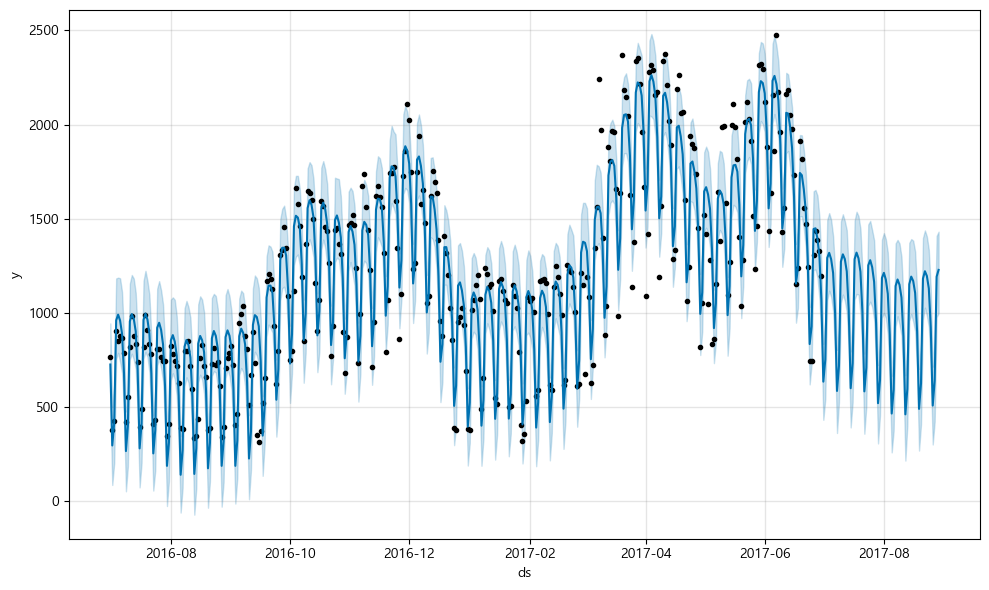

In [32]:
m.plot(forecast);

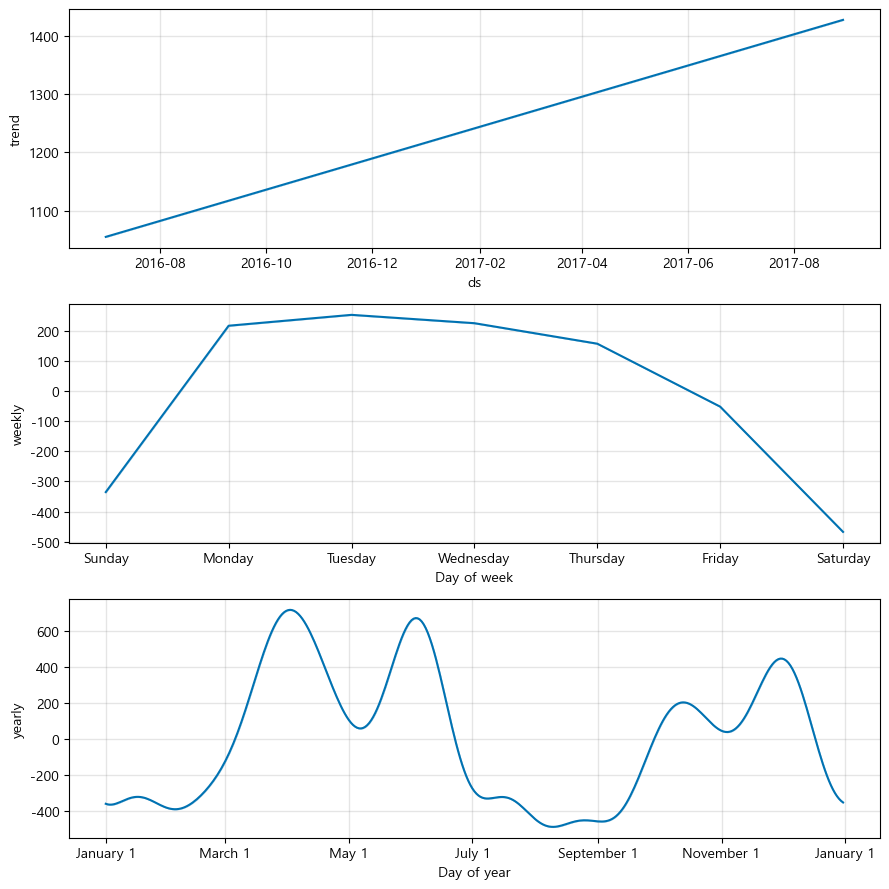

In [33]:
# 시간에 따른 추세, 연간 주기성 및 주간 주기성 등의 성분을 시각화
m.plot_components(forecast);

In [39]:
import pandas_datareader as pdr #Pandasd의 datareader 모듈 import

start = datetime(2003, 1, 1)
end = datetime(2017, 6, 30)

KIA = pdr.DataReader('000270.KS', 'yahoo', start, end) #yahoo 주가 정보 이용하기
KIA.head()

AttributeError: 'NoneType' object has no attribute 'group'

In [41]:
pip install yfinance


     ---------------------------------------- 0.0/316.0 kB ? eta -:--:--
     ---- -------------------------------- 41.0/316.0 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 316.0/316.0 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.7/3.0 MB 23.8 MB/s eta 0:00:01
     ------------------------- -------------- 1.9/3.0 MB 24.4 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 27.0 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 23.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Instal

In [42]:
import yfinance as yf

In [43]:
start = datetime(2003, 1, 1)
end = datetime(2017, 6, 30)

KIA = yf.download('000270.KS', start=start, end=end)
KIA.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-01,8800.0,8800.0,8800.0,8800.0,5719.673828,0
2003-01-02,9000.0,9200.0,8950.0,9190.0,5973.160645,688900
2003-01-03,9350.0,9720.0,9330.0,9550.0,6207.145996,1419800
2003-01-06,9720.0,9760.0,9500.0,9700.0,6304.641113,1076300
2003-01-07,9900.0,9920.0,9420.0,9420.0,6122.651367,1034100


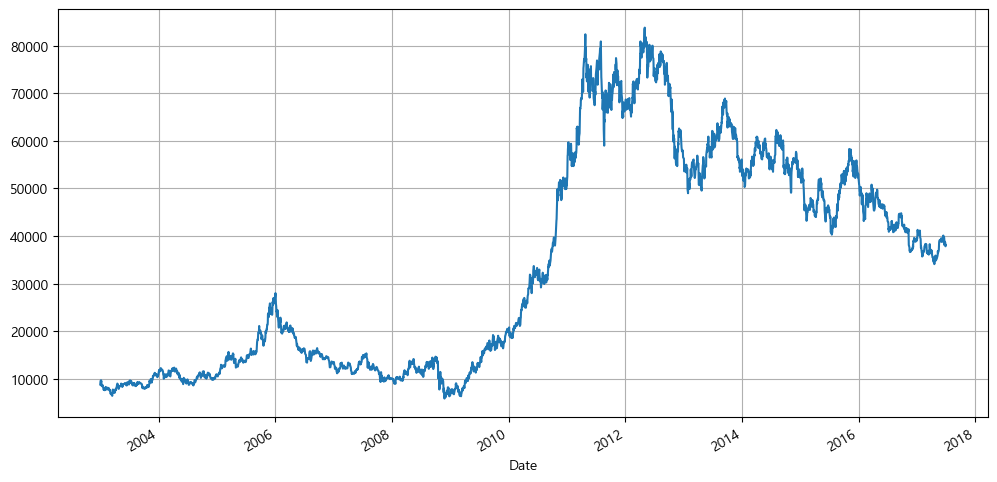

In [47]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [48]:
# '2016-12-31'까지의 데이터를 유지하고 나머지 데이터를 삭제
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc #'2016-12-31'까지의 데이터가 포함된 새로운 DataFrame인 KIA_trunc 생성

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-01,8800.0,8800.0,8800.0,8800.0,5719.673828,0
2003-01-02,9000.0,9200.0,8950.0,9190.0,5973.160645,688900
2003-01-03,9350.0,9720.0,9330.0,9550.0,6207.145996,1419800
2003-01-06,9720.0,9760.0,9500.0,9700.0,6304.641113,1076300
2003-01-07,9900.0,9920.0,9420.0,9420.0,6122.651367,1034100
...,...,...,...,...,...,...
2016-12-23,38700.0,39350.0,38650.0,39100.0,30182.337891,1070783
2016-12-26,39100.0,39350.0,38850.0,39000.0,30105.142578,465612
2016-12-27,39050.0,39700.0,39050.0,39500.0,30491.103516,879686


In [50]:
# 새로운 DataFrame 생성
df = pd.DataFrame({'ds': KIA_trunc.index, 'y': KIA_trunc['Close']})

# 인덱스 재설정
df.reset_index(inplace=True)

# 'Data' 열 삭제
del df['Date']

df.head()

,ds,y
0,2003-01-01,8800.0
1,2003-01-02,9190.0
2,2003-01-03,9550.0
3,2003-01-06,9700.0
4,2003-01-07,9420.0


In [51]:
m = Prophet() #Prophet()은 Prophet 모델을 초기화하는 것을 의미. 
m.fit(df); #초기화 후 fit() 메서드를 사용하여 주어진 데이터를 모델에 학습시킴

16:22:18 - cmdstanpy - INFO - Chain [1] start processing
16:22:19 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future = m.make_future_dataframe(periods=365) #365일 이후의 날짜를 생성하도록 설정
future.tail()

,ds
3880,2017-12-25
3881,2017-12-26
3882,2017-12-27
3883,2017-12-28
3884,2017-12-29


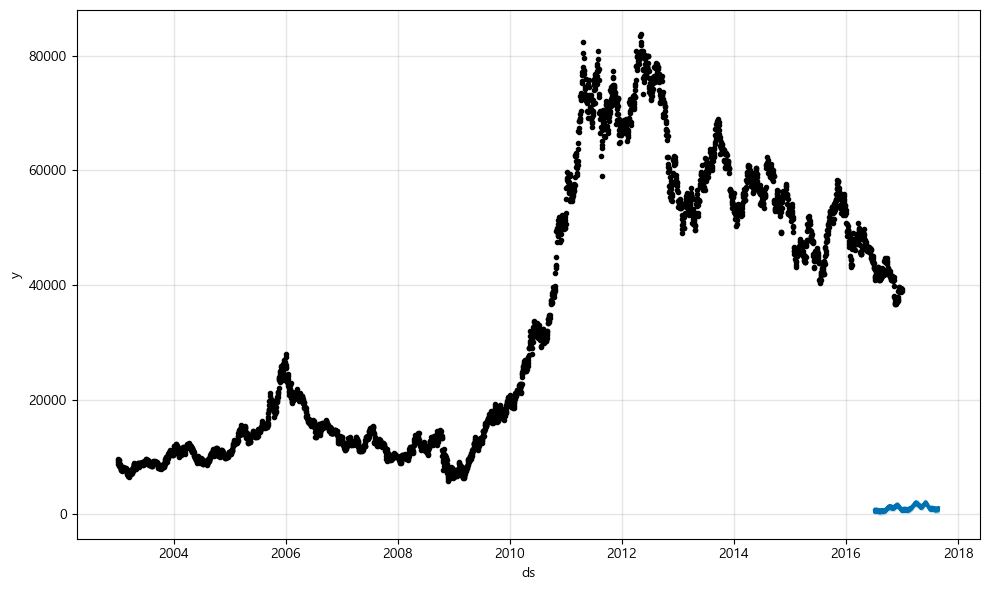

In [53]:
m.plot(forecast);

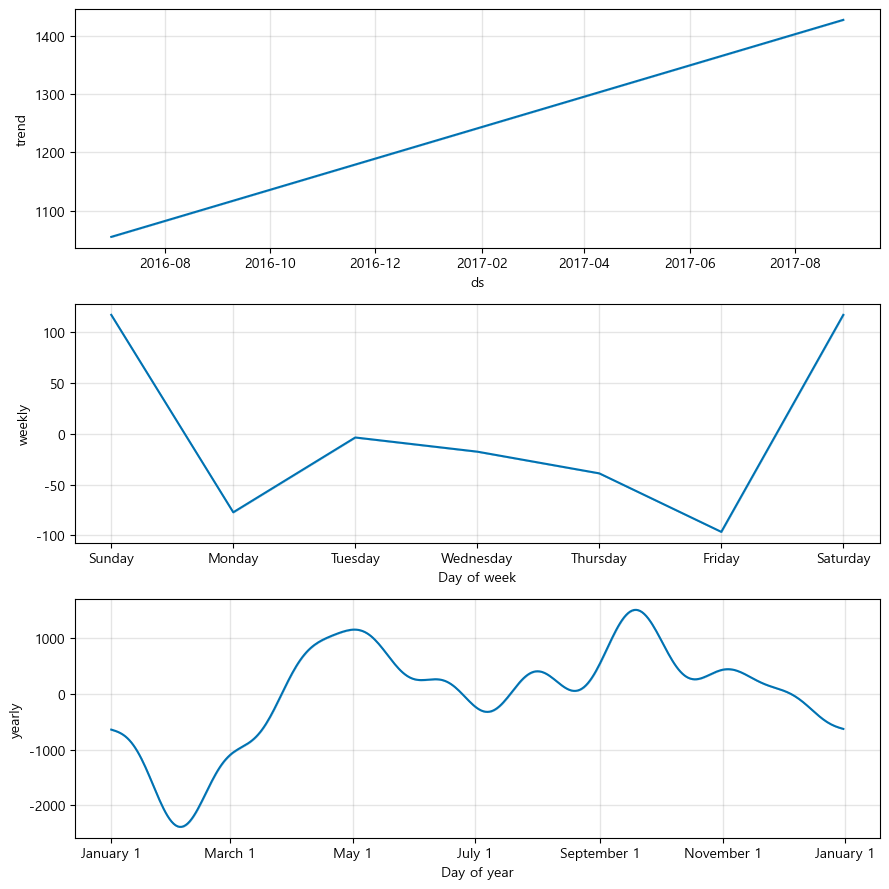

In [55]:
m.plot_components(forecast);

[*********************100%%**********************]  1 of 1 completed


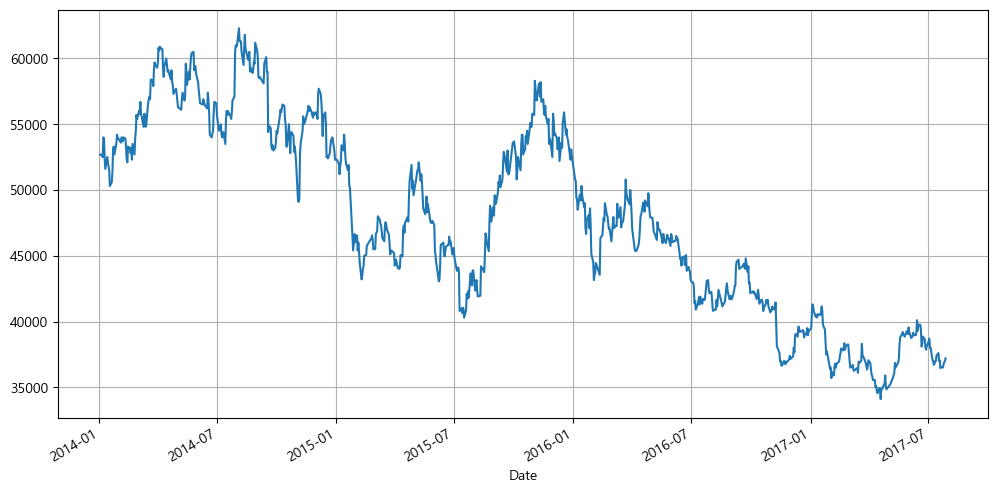

In [56]:
start = datetime(2014, 1, 1)
end = datetime(2017, 7, 31)

KIA = yf.download('000270.KS', start=start, end=end)
KIA['Close'].plot(figsize=(12,6), grid=True);

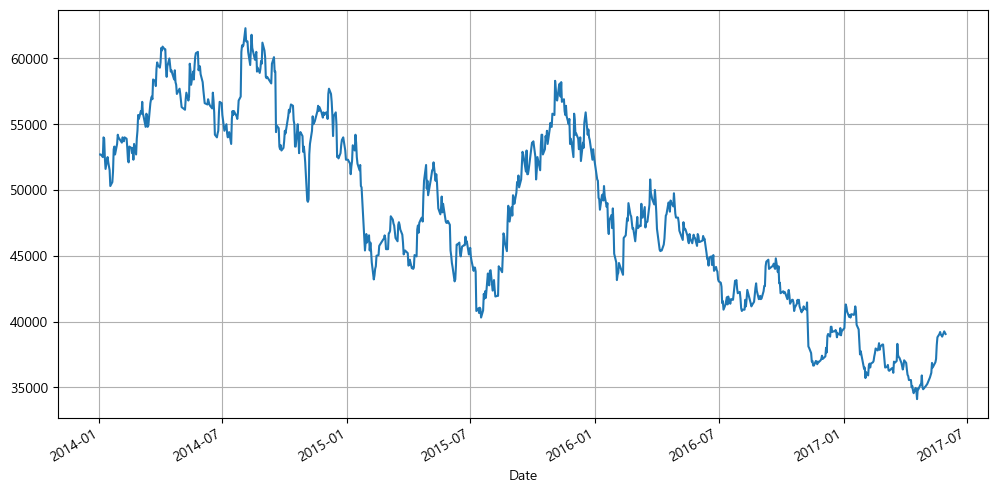

In [57]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [58]:
df = pd.DataFrame({'ds': KIA_trunc.index, 'y': KIA_trunc['Close']})

# 인덱스 재설정
df.reset_index(inplace=True)

# 'Data' 열 삭제
del df['Date']

In [59]:
m = Prophet()
m.fit(df);

16:45:09 - cmdstanpy - INFO - Chain [1] start processing
16:45:09 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


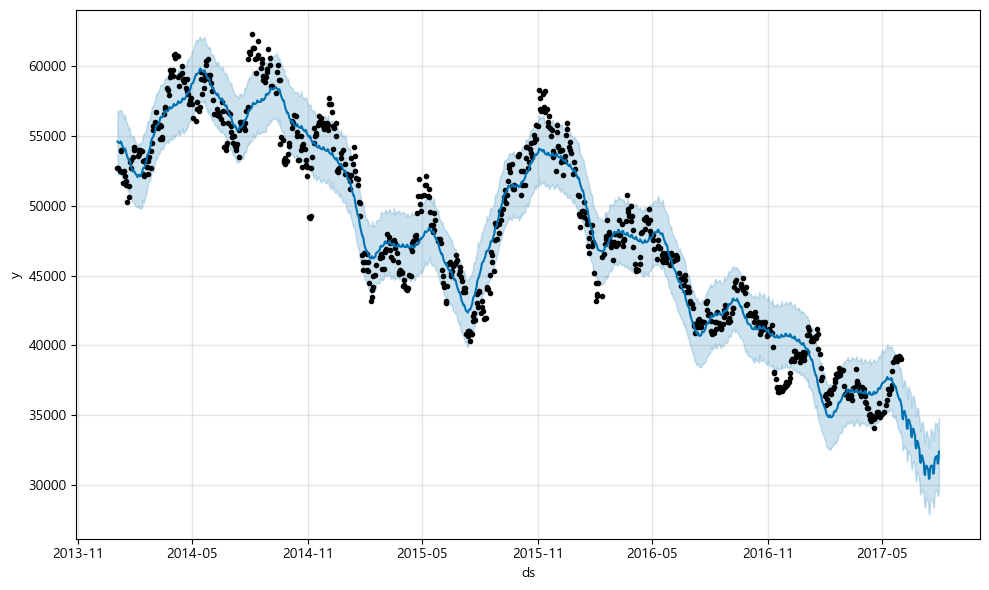

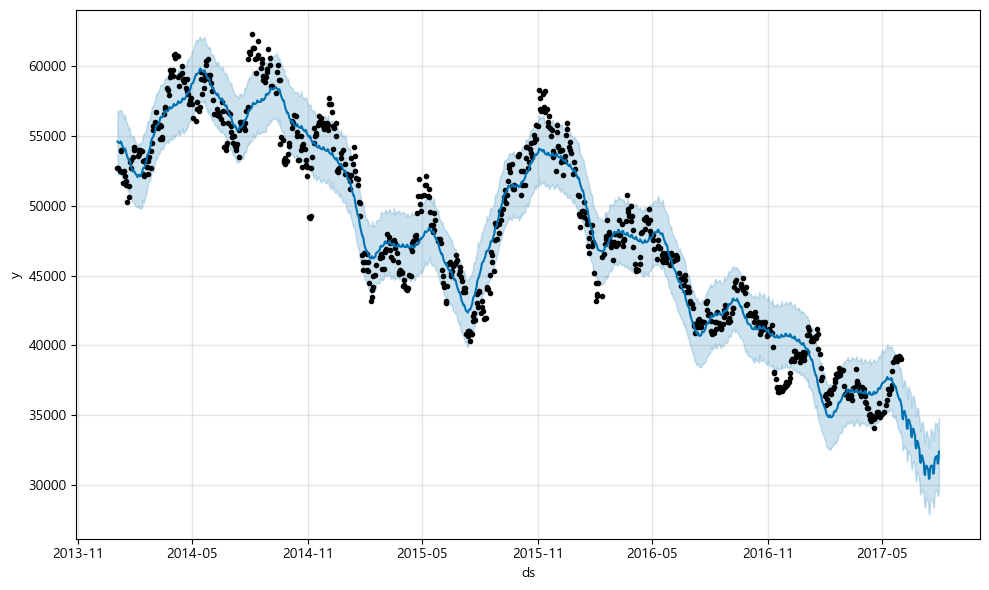

In [61]:
forecast = m.predict(future)
m.plot(forecast)

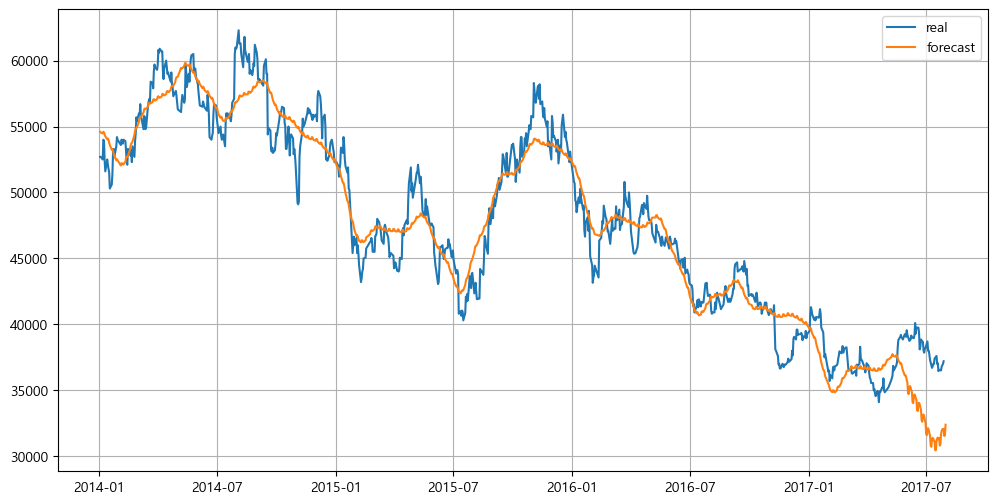

In [64]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [65]:
# CSV 파일을 읽어와서 DataFrame으로 저장
df = pd.read_csv('../data/08. example_wp_R.csv')

# 'y' 열에 로그 변환 적용
df['y'] = np.log(df['y'])

In [66]:
df['cap'] = 8.5 #DataFrame에 'cap'이라는 새로운 열을 추가하고, 모든 행에 8.5라는 값을 할당

In [67]:
m = Prophet(growth='logistic')
m.fit(df)

17:01:39 - cmdstanpy - INFO - Chain [1] start processing
17:01:39 - cmdstanpy - INFO - Chain [1] done processing


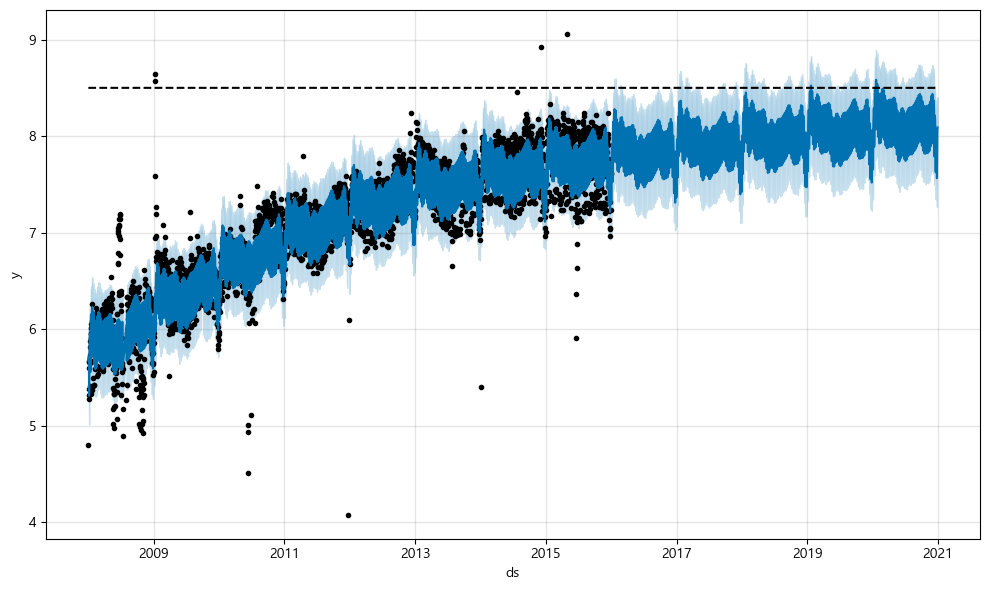

In [69]:
# Prophet 모델을 사용하여 미래의 날짜를 생성한 후, 해당 날짜에 대한 예측을 수행하고,
# 그 결과를 그래프로 시각화하는 작업을 수행

# make_future_dataframe 메서드를 사용하여 1826일 (약 5년) 이후의 날짜를 생성
future = m.make_future_dataframe(periods=1826)
# 로지스틱 성장 모델에서 상한선(cap)을 지정. DataFrame에 'cap'이라는 새로운 열을 추가하고, 모든 행에 8.5라는 값을 할당
future['cap'] = 8.5

#predict 메서드를 사용하여 미래의 데이터에 대한 예측을 수행
fcst = m.predict(future)

#plot 메서드를 사용하여 예측 결과를 시각화
m.plot(fcst);

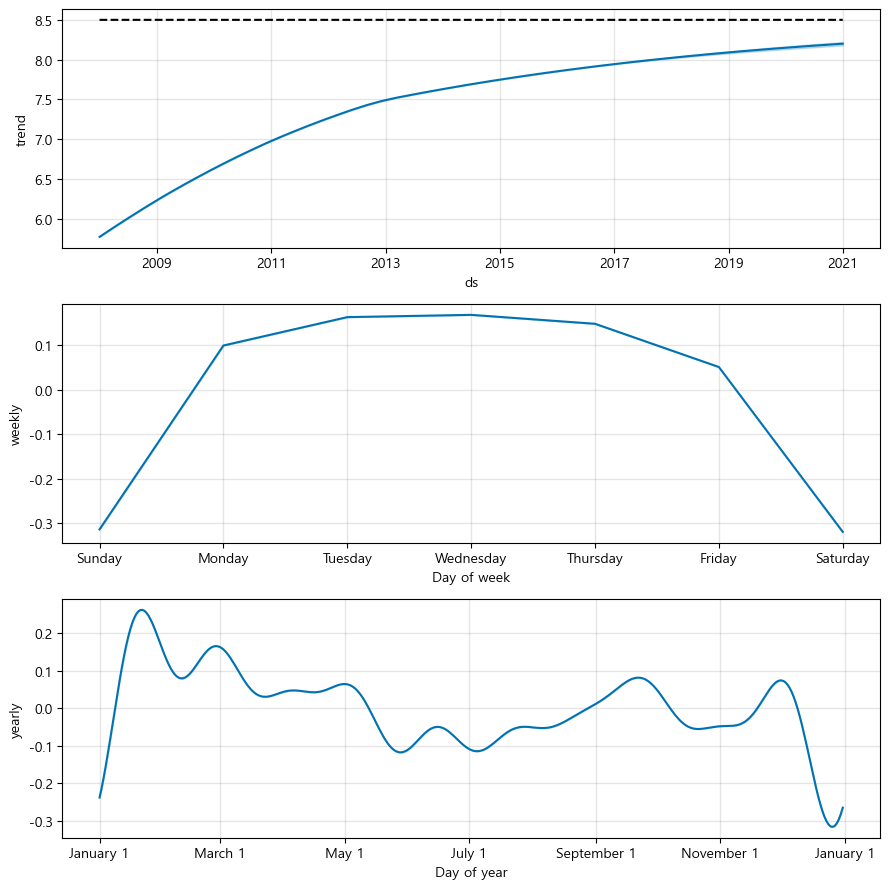

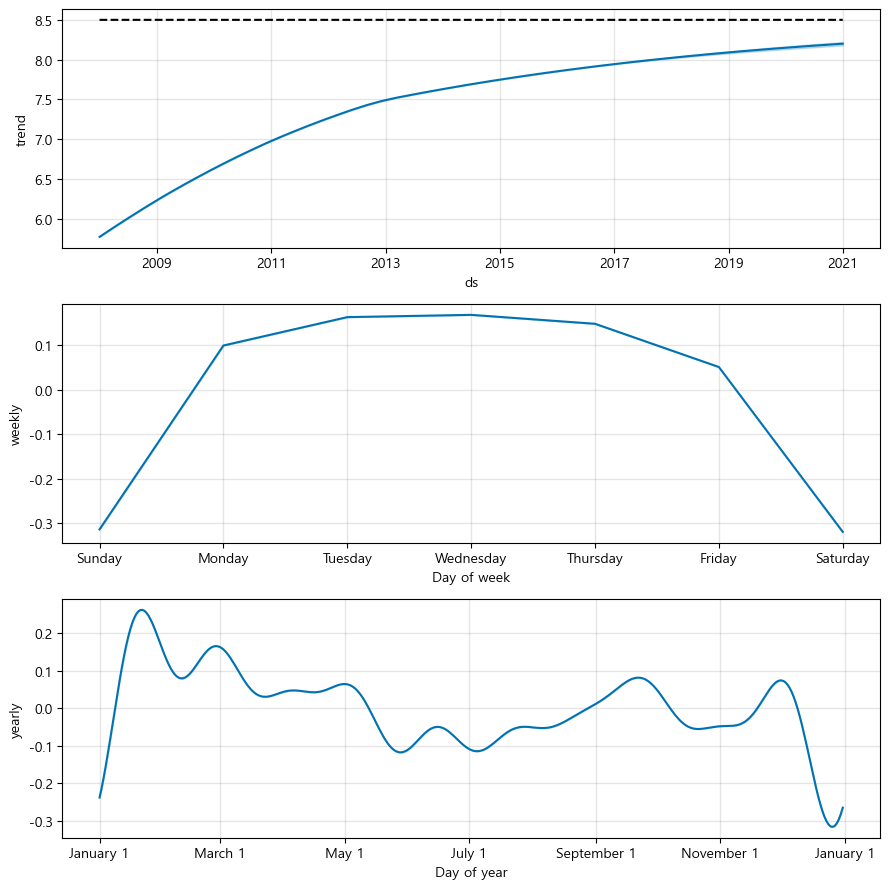

In [70]:
forecast = m.predict(future)
m.plot_components(forecast);m.plot_components(forecast);